# 0 day

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [42]:
class HomoSapiens:
    _STATUS = [
        'ALIVE',
        'DEAD'
    ]
    
    def __init__(self):
        self.coords = (np.random.randint(0, 101), np.random.randint(0, 101))
        self.health = 100
        self.current_status = self._STATUS[0]
    
    def get_position(self):
        return self.coords
    
    def set_position(self, new_coords):
        if self.am_i_alive():
            self.coords = new_coords
    
    def lost_health(self):
        self.health -= np.random.randint(0, 100)
    
    def am_i_alive(self)->bool:
        return self.current_status == self._STATUS[0]


class Human(HomoSapiens):
    _STATE = {
        'Dead': 0.1,
        'Bitten': 0.3,
        'Lost Health': 0.3,
        'Nothing': 0.3
    }
    
    def __init__(self):
        super().__init__()
        self._HEALTH = {
            'Dead': self.dead,
            'Bitten': self.reborn_to_a_zombie,
            'Lost Health': self.lost_health,
            'Nothing': 0
        }
    
    def reborn_to_a_zombie(self):
        self.__class__ = Zombie
    
    def collision(self):
        return self._HEALTH[np.random.choice(list(self._STATE.keys()), p=list(self._STATE.values()))]
    
    def dead(self):
        self.current_status == self._STATUS[1]
    

class Zombie(HomoSapiens):
    _STATE = {
        'Dead': 0.1,
        'Bit': 0.3,
        'Ate': 0.2,
        'Lost Health': 0.2,
        'Nothing': 0.2
    }
    
    def __init__(self):
        super().__init__()
        
    def collision(self):
        result = np.random.choice(list(self._STATE.keys()), p=list(self._STATE.values()))
        


In [43]:
h = Human()
print(h.current_status)
print(h.current_status)

ALIVE
ALIVE


In [13]:
class ZombieApocalypse():
    def __init__(self, humans=100, zombies=10):
        self.humans = self.create(Human, humans)
        self.zombies = self.create(Zombie, zombies)
        
    def create(self, class_name, amount):    
        return [class_name() for _ in range(amount)]  
    
    def show_info(self):
        print(f'HUMANS: {len(self.humans)}, ZOMBIES: {len(self.zombies)}')
    
    def collision(self):
        r = []
        h = np.random.choice(self.humans)
        if isinstance(h, Human):
            r.append(h.collision())
        z = np.random.choice(self.zombies)
        r.append(z.collision())
        return r
    
    def visualize(self):
        h_coords = {'x': [], 'y': []}
        z_coords = {'x': [], 'y': []}
        
        for h, z in zip(self.humans, self.zombies):
            h_coords['x'].append(h.get_position()[0])
            h_coords['y'].append(h.get_position()[1])
            z_coords['x'].append(z.get_position()[0])
            z_coords['y'].append(z.get_position()[1])
        
        fig, ax = plt.subplots()
        ax.scatter(h_coords['x'], h_coords['y'], c='pink')
        ax.scatter(z_coords['x'], z_coords['y'], c='g')
        

In [14]:
za = ZombieApocalypse(20, 5)
# za.visualize()
za.collision()

['Nothing', 'Ate']

In [15]:
for _ in range(10):
    print(za.collision())

['Bitten', 'Bit']
['Lost Health', 'Bit']
['Lost Health', 'Bit']
['Dead', 'Lost Health']
['Nothing', 'Lost Health']
['Nothing', 'Ate']
['Nothing', 'Bit']
['Lost Health', 'Lost Health']
['Bitten', 'Ate']
['Bitten', 'Lost Health']


In [25]:
humans = [Human() for i in range(10)]
zombies = [Zombie() for i in range(10)]

In [26]:
h_coords = {'x': [], 'y': []}
z_coords = {'x': [], 'y': []}
for h, z in zip(humans, zombies):
    h_coords['x'].append(h.get_position()[0])
    h_coords['y'].append(h.get_position()[1])
    z_coords['x'].append(z.get_position()[0])
    z_coords['y'].append(z.get_position()[1])

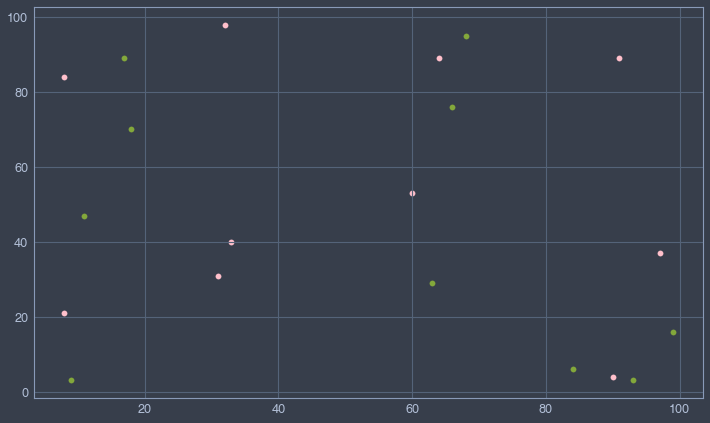

In [29]:
fig, ax = plt.subplots()
ax.scatter(h_coords['x'], h_coords['y'], c='pink')
ax.scatter(z_coords['x'], z_coords['y'], c='g')